In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
print("JEU DE TRAIN")
#RECUPERER LES SCORES DU JEU D ENTRAINEMENT
dataset = pd.read_csv("./donnees/resultats/train_scores_false.csv")
scores_train_false = np.array(dataset['score'])

dataset = pd.read_csv("./donnees/resultats/train_scores_partfalse_BERT.csv")
scores_train_partfalse = np.array(dataset['score'])

dataset = pd.read_csv("./donnees/resultats/train_scores_other_BERT.csv")
scores_train_other = np.array(dataset['score'])

dataset = pd.read_csv("./donnees/resultats/train_scores_true_BERT.csv")
scores_train_true = np.array(dataset['score'])
labels = np.array(dataset['label'])

print(scores_train_true.shape)
scores_train_all = np.column_stack([scores_train_false, scores_train_partfalse,
                                    scores_train_other, scores_train_true, labels])
print(scores_train_all.shape)

print("JEU DE TEST")
#RECUPERER LES SCORES DU JEU DE TEST
dataset = pd.read_csv("./donnees/resultats/test_scores_false.csv")
scores_test_false = np.array(dataset['score'])

dataset = pd.read_csv("./donnees/resultats/test_scores_partfalse_BERT.csv")
scores_test_partfalse = np.array(dataset['score'])

dataset = pd.read_csv("./donnees/resultats/test_scores_other_BERT.csv")
scores_test_other = np.array(dataset['score'])

dataset = pd.read_csv("./donnees/resultats/test_scores_true_BERT.csv")
scores_test_true = np.array(dataset['score'])
labels_tests = np.array(dataset['label'])

print(scores_test_true.shape)
scores_test_all = np.column_stack([scores_test_false, scores_test_partfalse,
                                    scores_test_other, scores_test_true, labels_tests])
print(scores_test_all.shape)

print("JEU DE DEV")
#RECUPERER LES SCORES DU JEU DE DEV
dataset = pd.read_csv("./donnees/resultats/dev_scores_false.csv")

scores_dev_false = np.array(dataset['score'])

dataset = pd.read_csv("./donnees/resultats/dev_scores_partfalse_BERT.csv")
scores_dev_partfalse = np.array(dataset['score'])

dataset = pd.read_csv("./donnees/resultats/dev_scores_other_BERT.csv")
scores_dev_other = np.array(dataset['score'])

dataset = pd.read_csv("./donnees/resultats/dev_scores_true_BERT.csv")
scores_dev_true = np.array(dataset['score'])
labels_dev = np.array(dataset['label'])

print(scores_dev_true.shape)
scores_dev_all = np.column_stack([scores_dev_false, scores_dev_partfalse,
                                    scores_dev_other, scores_dev_true, labels_dev])
print(scores_dev_all.shape)

X = scores_train_all[:, :4]
y = scores_train_all[:, 4]
# print(X.shape)
X_dev = scores_dev_all[:, :4]
y_dev = scores_dev_all[:, 4]
X_test = scores_test_all[:, :4]
y_test = scores_test_all[:, 4]

JEU DE TRAIN
(837,)
(837, 5)
JEU DE TEST
(527,)
(527, 5)
JEU DE DEV
(336,)
(336, 5)


In [3]:
print(scores_train_all[:5])

[[0.9638237  0.06603225 0.03258978 0.01790544 0.        ]
 [0.08561729 0.87130535 0.02529365 0.02185414 2.        ]
 [0.36588782 0.01966586 0.0349899  0.01195457 2.        ]
 [1.0816929  0.01829062 0.03019054 0.01187095 0.        ]
 [1.0749449  0.01551613 0.02362468 0.01278834 0.        ]]


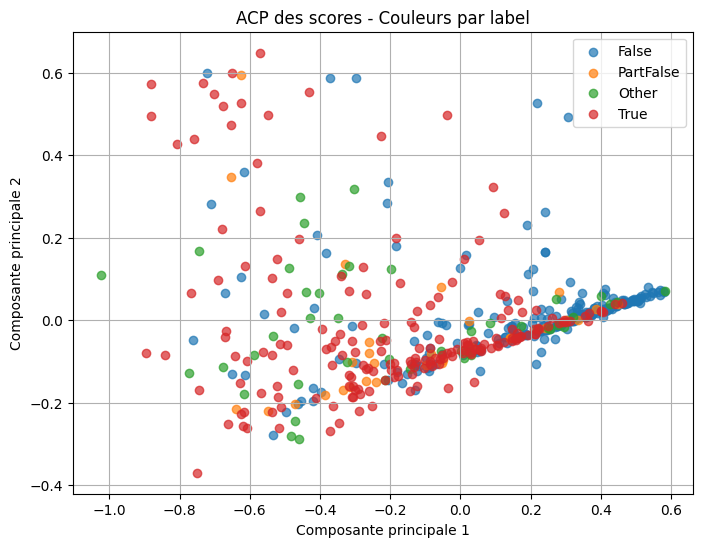

In [4]:
# Données
#X = scores_dev_all[:, :4]
#y = scores_dev_all[:, 4]

# ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Dictionnaire de correspondance label → nom
label_names = {
    0: 'False',
    1: 'PartFalse',
    2: 'Other',
    3: 'True'
}

# Couleurs
unique_labels = np.unique(y)
cmap = plt.colormaps.get_cmap('tab10')

# Tracer avec noms
plt.figure(figsize=(8, 6))
for i, label in enumerate(unique_labels):
    plt.scatter(
        X_pca[y_test == label, 0],
        X_pca[y_test == label, 1],
        color=cmap(i % 10),
        label=label_names.get(int(label), f'Label {int(label)}'),  # fallback au cas où
        alpha=0.7
    )

plt.title("ACP des scores - Couleurs par label")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()
plt.grid(True)
plt.show()

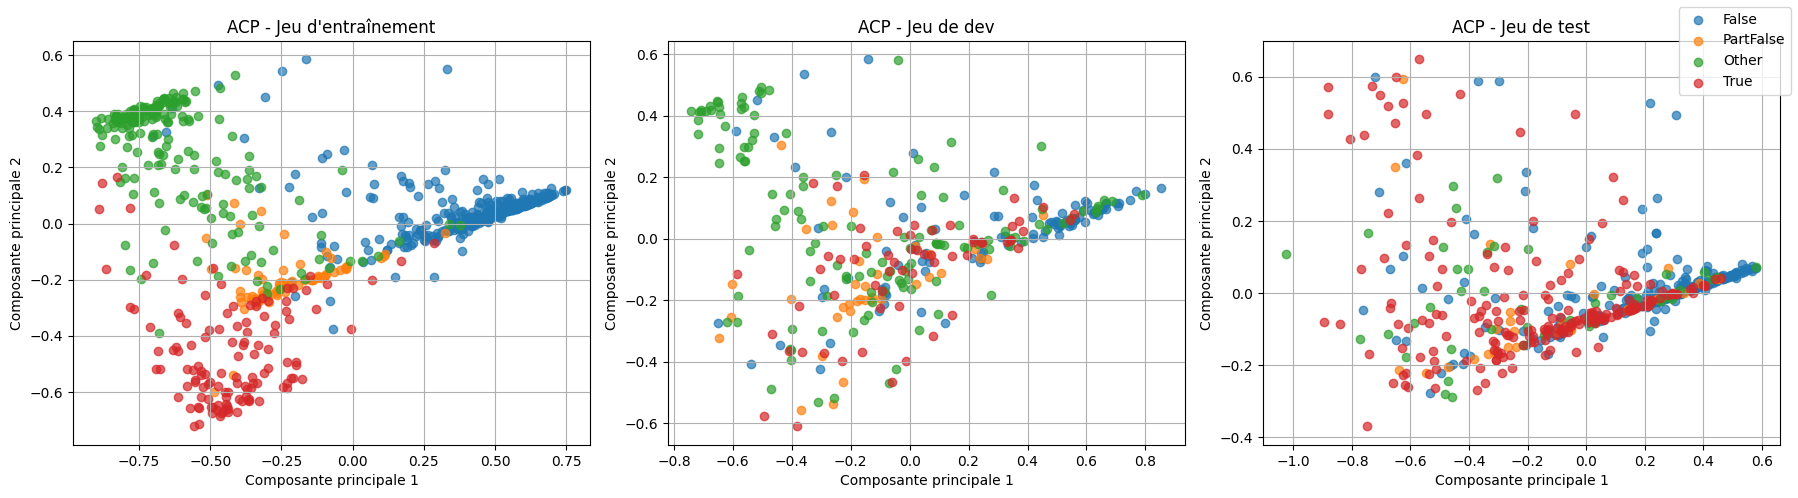

In [5]:
# Fonctions de projection et d'affichage
def plot_pca(ax, data, title, label_names, cmap):
    X = data[:, :4]
    y = data[:, 4]

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    unique_labels = np.unique(y)
    for i, label in enumerate(unique_labels):
        ax.scatter(
            X_pca[y == label, 0],
            X_pca[y == label, 1],
            color=cmap(i % 10),
            label=label_names.get(int(label), f'Label {int(label)}'),
            alpha=0.7
        )
    ax.set_title(title)
    ax.set_xlabel("Composante principale 1")
    ax.set_ylabel("Composante principale 2")
    ax.grid(True)

label_names = {
    0: 'False',
    1: 'PartFalse',
    2: 'Other',
    3: 'True'
}

cmap = plt.colormaps.get_cmap('tab10')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tracer chaque jeu
plot_pca(axes[0], scores_train_all, "ACP - Jeu d'entraînement", label_names, cmap)
plot_pca(axes[1], scores_dev_all, "ACP - Jeu de dev", label_names, cmap)
plot_pca(axes[2], scores_test_all, "ACP - Jeu de test", label_names, cmap)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()


In [6]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X, y)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_clf.fit(X, y)

kmeans = KMeans(n_clusters=4, random_state=42)  # 4 clusters pour nos 4 labels
kmeans.fit(X)

# Fonction pour évaluer
def evaluate(model, X_data, y_true, dataset_name):
    y_pred = model.predict(X_data)
    acc =  accuracy_score(y_true, y_pred)
    print("Accuracy :", acc)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print("F1-score :", f1)
    return acc, f1

# 3. Évaluer sur train, dev, test
evaluate(clf, X, y, "TRAIN")
evaluate(clf, X_dev, y_dev, "DEV")
evaluate(clf, X_test, y_test, "TEST")
print("--------------------------------------")
evaluate(rf_clf, X, y, "TRAIN")
evaluate(rf_clf, X_dev, y_dev, "DEV")
evaluate(rf_clf, X_test, y_test, "TEST")
print("--------------------------------------")
a, b = evaluate(kmeans, X, y, "TRAIN")
evaluate(kmeans, X_dev, y_dev, "DEV")
evaluate(kmeans, X_test, y_test, "TEST")

Accuracy : 0.961768219832736
F1-score : 0.9620303122934639
Accuracy : 0.5148809523809523
F1-score : 0.5080841410976236
Accuracy : 0.5123339658444023
F1-score : 0.4666942571927874
--------------------------------------
Accuracy : 0.9629629629629629
F1-score : 0.9632334037897243
Accuracy : 0.5059523809523809
F1-score : 0.4968632442869156
Accuracy : 0.5351043643263758
F1-score : 0.47523071803664346
--------------------------------------
Accuracy : 0.5244922341696535
F1-score : 0.5384057719518398
Accuracy : 0.3392857142857143
F1-score : 0.3249463868234633
Accuracy : 0.571157495256167
F1-score : 0.5539429959901193


(0.571157495256167, np.float64(0.5539429959901193))

In [7]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

# Paramètres à explorer dans GridSearch
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un noeud
    'min_samples_leaf': [1, 2, 4],  # Nombre minimum d'échantillons requis dans un feuille
    'max_features': ['auto', 'sqrt', 'log2'],  # Nombre de caractéristiques à prendre en compte lors de la recherche du meilleur split
    'bootstrap': [True, False]  # Utiliser un échantillon bootstrap pour la construction des arbres
}

# Initialiser GridSearchCV avec RandomForest et les paramètres à tester
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Entraîner le modèle sur le jeu d'entraînement
grid_search.fit(X, y)

# Afficher les meilleurs paramètres trouvés
print("\nMeilleurs paramètres trouvés avec GridSearchCV :")
print(grid_search.best_params_)

# Utiliser le meilleur modèle pour prédire et évaluer
best_rf = grid_search.best_estimator_

acc_train, f1_train = evaluate(best_rf, X, y, "TRAIN")
acc_dev, f1_dev = evaluate(best_rf, X_dev, y_dev, "DEV")
acc_test, f1_test = evaluate(best_rf, X_test, y_test, "TEST")

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estima

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
471 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Définir le modèle KNeighborsClassifier
knn = KNeighborsClassifier()

# Paramètres à explorer dans GridSearch
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Nombre de voisins à tester
    'weights': ['uniform', 'distance'],  # Poids des voisins (uniforme ou basé sur la distance)
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithme pour calculer les voisins
    'leaf_size': [20, 30, 40],  # Taille de la feuille pour ball_tree et kd_tree
    'p': [1, 2]  # Distance de Minkowski (1 pour Manhattan, 2 pour Euclidean)
}

# Initialiser GridSearchCV avec KNeighborsClassifier et les paramètres à tester
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Entraîner le modèle sur le jeu d'entraînement (X) avec GridSearchCV
grid_search.fit(X, y)

# Afficher les meilleurs paramètres trouvés
print("\nMeilleurs paramètres trouvés avec GridSearchCV :")
print(grid_search.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions sur le jeu de développement (X_dev)
best_knn = grid_search.best_estimator_

acc_train, f1_train = evaluate(best_knn, X, y, "TRAIN")

acc_dev, f1_dev = evaluate(best_knn, X_dev, y_dev, "DEV")

acc_test, f1_test = evaluate(best_knn, X_test, y_test, "TEST")


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


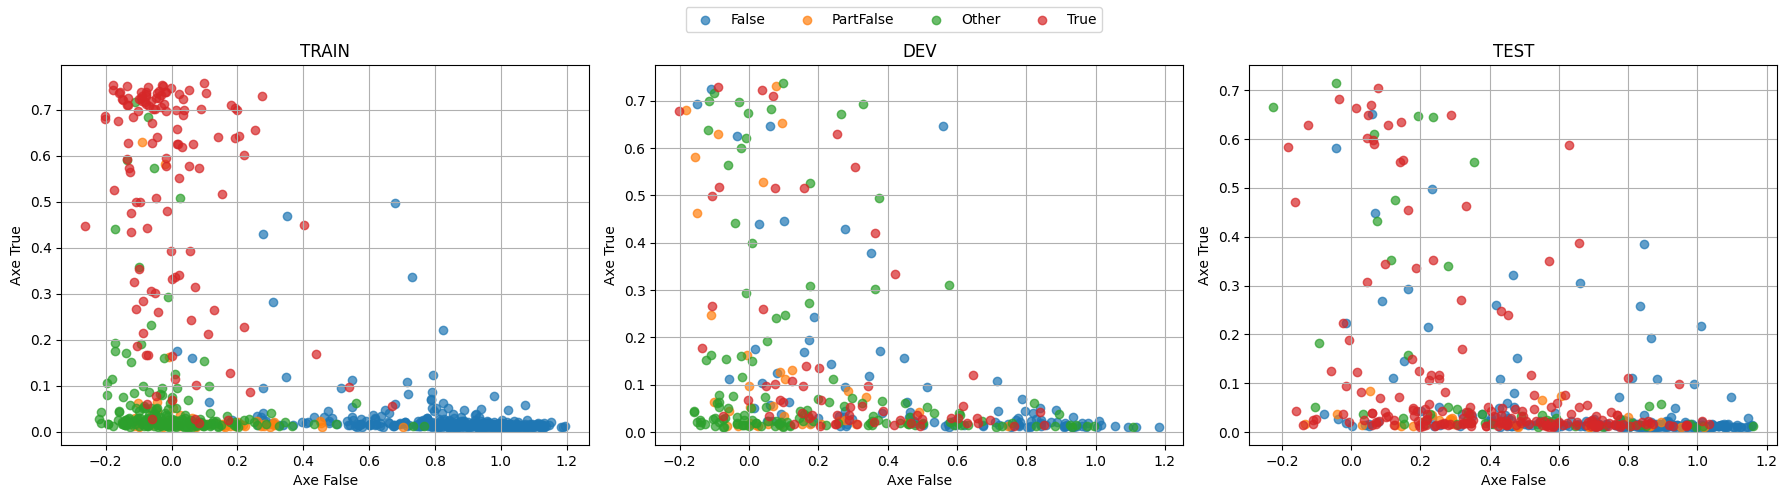

In [9]:
scores_train_2 = scores_train_all[:, [0, 3, 4]]
scores_dev_2 = scores_dev_all[:, [0, 3, 4]]
scores_test_2 = scores_test_all[:, [0, 3, 4]]

import matplotlib.pyplot as plt
import numpy as np

# Définir la colormap et les noms de labels
cmap = plt.get_cmap('tab10')
label_names = {0: 'False', 1: 'PartFalse', 2: 'Other', 3: 'True'}

# Données à afficher
datasets = [
    ("TRAIN", scores_train_2, y),
    ("DEV", scores_dev_2, y_dev),
    ("TEST", scores_test_2, y_test)
]

# Créer les sous-figures côte à côte
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 ligne, 3 colonnes

for ax, (name, X_data, y_data) in zip(axes, datasets):
    for i, label in enumerate(np.unique(y_data)):
        ax.scatter(
            X_data[y_data == label, 0],
            X_data[y_data == label, 1],
            color=cmap(i % 10),
            label=label_names.get(int(label), f'Label {int(label)}'),
            alpha=0.7
        )
    ax.set_title(f'{name}')
    ax.set_xlabel('Axe False')
    ax.set_ylabel('Axe True')
    ax.grid(True)

# Ajouter une légende globale
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4)

# Ajuster l'espacement
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
